# Roman Empire Data Analysis
## Uncovering Patterns in Ancient Civilization Through Data Science

This notebook analyzes data from the Roman Empire using modern machine learning techniques to understand patterns in ancient settlements, economic activity, and civilization dynamics.

### Author: Data Science Blog Post Project
### Date: December 2025


## 1. Business Understanding (CRISP-DM Step 1)

### Research Questions:
1. What factors predicted the prosperity/size of Roman settlements?
2. Can we predict settlement characteristics based on geographical and infrastructure features?
3. What patterns exist in Roman settlement distribution?
4. How accurate can a machine learning model predict Roman settlement features?
5. What would happen in a hypothetical scenario with a new Roman settlement?


## 2. Setup Code Quality Tools (PEP8 Compliance)

### Install and Load Code Style Checkers

This section sets up tools to ensure our code follows PEP8 style guidelines.
Run this cell once to install the required packages (uncomment if needed).


In [ ]:
# Install PEP8 checking tools (uncomment if needed)
# !pip install pycodestyle pycodestyle_magic flake8

# Load the pycodestyle magic extension
%load_ext pycodestyle_magic

print("✓ PEP8 checking tools loaded successfully!")
print("Add '%%pycodestyle' at the top of any code cell to check PEP8 compliance.")


## 3. Import Libraries (GATHER)


In [ ]:
%%pycodestyle

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine learning - model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error,
                             accuracy_score, precision_score, recall_score,
                             classification_report)

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Set visualization style for consistent, professional plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully!")


Libraries imported successfully!


## 4. Data Understanding (CRISP-DM Step 2: GATHER & ASSESS)

### Load and Explore the Dataset

This section loads the Roman Emperors dataset and performs initial exploration
to understand its structure, data types, and basic statistics.


In [ ]:
%%pycodestyle

# Load the Roman Emperors dataset
# Note: The file uses ISO-8859-1 (latin-1) encoding to handle special characters
df = pd.read_csv('data/roman_emperors.csv', encoding='latin-1')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print(f"Number of emperors: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\n" + "="*80)
print("First few rows of the dataset:")
df.head()


Dataset Shape: (68, 16)

Column Names and Types:
index           int64
name           object
name.full      object
birth          object
death          object
birth.cty      object
birth.prv      object
rise           object
reign.start    object
reign.end      object
cause          object
killer         object
dynasty        object
era            object
notes          object
verif.who      object
dtype: object

First few rows of the dataset:


,index,name,name.full,birth,death,birth.cty,birth.prv,rise,reign.start,reign.end,cause,killer,dynasty,era,notes,verif.who
0,1,Augustus,IMPERATOR CAESAR DIVI FILIVS AVGVSTVS,0062-09-23,0014-08-19,Rome,Italia,Birthright,0026-01-16,0014-08-19,Assassination,Wife,Julio-Claudian,Principate,"birth, reign.start are BCE. Assign negative fo...",Reddit user zonination
1,2,Tiberius,TIBERIVS CAESAR DIVI AVGVSTI FILIVS AVGVSTVS,0041-11-16,0037-03-16,Rome,Italia,Birthright,0014-09-18,0037-03-16,Assassination,Other Emperor,Julio-Claudian,Principate,birth is BCE. Assign negative for correct ISO ...,Reddit user zonination
2,3,Caligula,GAIVS IVLIVS CAESAR AVGVSTVS GERMANICVS,0012-08-31,0041-01-24,Antitum,Italia,Birthright,0037-03-18,0041-01-24,Assassination,Senate,Julio-Claudian,Principate,assassination may have only involved the Praet...,Reddit user zonination
3,4,Claudius,TIBERIVS CLAVDIVS CAESAR AVGVSTVS GERMANICVS,0009-08-01,0054-10-13,Lugdunum,Gallia Lugdunensis,Birthright,0041-01-25,0054-10-13,Assassination,Wife,Julio-Claudian,Principate,birth is BCE. Assign negative for correct ISO ...,Reddit user zonination
4,5,Nero,NERO CLAVDIVS CAESAR AVGVSTVS GERMANICVS,0037-12-15,0068-06-09,Antitum,Italia,Birthright,0054-10-13,0068-06-09,Suicide,Senate,Julio-Claudian,Principate,NaN,Reddit user zonination


### Initial Data Exploration


In [3]:
# Check for missing values
print("Missing Values Analysis:")
print("="*80)
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent
})
print(missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))

# Summary statistics
print("\n" + "="*80)
print("Summary Statistics:")
print("="*80)
df.describe(include='all')


Missing Values Analysis:
           Missing_Count  Missing_Percent
verif.who             57        83.823529
notes                 22        32.352941
birth.cty             17        25.000000
birth                  5         7.352941

Summary Statistics:


,index,name,name.full,birth,death,birth.cty,birth.prv,rise,reign.start,reign.end,cause,killer,dynasty,era,notes,verif.who
count,68.00000,68,68,63,68,51,68,68,68,68,68,68,68,68,46,11
unique,NaN,68,67,60,66,30,18,8,57,65,7,14,8,2,23,2
top,NaN,Augustus,TITVS FLAVIVS CAESAR VESPASIANVS AVGVSTVS,0178-01-01,0238-07-29,Rome,Italia,Birthright,0238-04-22,0238-07-29,Assassination,Other Emperor,Gordian,Principate,birth is only estimate.,Reddit user zonination
freq,NaN,1,2,2,2,9,22,35,3,2,25,18,22,48,9,6
mean,34.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,19.77372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,17.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,34.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,51.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


%%pycodestyle

# Check raw date column values before parsing
# This helps us understand the date format in the dataset
print("Sample of raw date values:")
print("="*80)
print(df[['name', 'birth', 'death', 'reign.start', 'reign.end']].head())

print("\nData types of date columns:")
print(df[['birth', 'death', 'reign.start', 'reign.end']].dtypes)

## Feature Engineering: Creating Numeric Features (CRISP-DM: CLEAN & ANALYZE)


In [ ]:
# Convert dates to datetime format for feature engineering
# Note: BCE dates in the dataset are represented with year format like "0062" for 62 BCE
# pandas will treat these as CE (AD) dates, which is fine for calculating durations

%%pycodestyle

print("Converting date columns...")


def parse_roman_date(date_str):
    """
    Parse dates in YYYY-MM-DD format, handling years < 1000.
    
    pandas' pd.to_datetime() rejects years like "0062" (year 62 CE) as invalid.
    This function manually parses the date string and creates a Timestamp object.
    
    Parameters:
    -----------
    date_str : str
        Date string in format 'YYYY-MM-DD'
    
    Returns:
    --------
    pd.Timestamp or pd.NaT
        Parsed timestamp or NaT if parsing fails
    
    Example:
    --------
    >>> parse_roman_date('0062-09-23')
    Timestamp('0062-09-23 00:00:00')
    """
    # Handle missing or empty values
    if pd.isna(date_str) or date_str == '':
        return pd.NaT
    
    try:
        # Split date string into components
        parts = date_str.split('-')
        year = int(parts[0])
        month = int(parts[1])
        day = int(parts[2])
        
        # Create timestamp (pd.Timestamp accepts years < 1000)
        return pd.Timestamp(year=year, month=month, day=day)
    except Exception:
        # Return NaT if parsing fails for any reason
        return pd.NaT


# Apply the custom date parser to all date columns
df['birth'] = df['birth'].apply(parse_roman_date)
df['death'] = df['death'].apply(parse_roman_date)
df['reign.start'] = df['reign.start'].apply(parse_roman_date)
df['reign.end'] = df['reign.end'].apply(parse_roman_date)

# Create derived numeric features from date differences
# We calculate time differences and convert to years (using 365.25 days/year)
# Note: Using .apply() with lambda instead of .dt.days due to object dtype

# Calculate age at death (in years)
df['age_at_death'] = (df['death'] - df['birth']).apply(
    lambda x: x.days / 365.25 if pd.notna(x) else None
)

# Calculate reign length (in years) - our primary target variable
df['reign_length_years'] = (df['reign.end'] - df['reign.start']).apply(
    lambda x: x.days / 365.25 if pd.notna(x) else None
)

# Calculate age when reign started (in years)
df['age_at_reign_start'] = (df['reign.start'] - df['birth']).apply(
    lambda x: x.days / 365.25 if pd.notna(x) else None
)

print("New Features Created:")
print("="*80)
print(f"Successfully parsed dates for {df['reign_length_years'].notna().sum()} out of {len(df)} emperors")
print("\nSample of derived features:")
print(df[['name', 'age_at_death', 'reign_length_years', 'age_at_reign_start']].head(10))

# Display summary statistics
print("\n" + "="*80)
print("Feature Statistics:")
print(df[['age_at_death', 'reign_length_years', 'age_at_reign_start']].describe())


Converting date columns...
New Features Created:
Successfully parsed dates for 68 out of 68 emperors

Sample of derived features:
        name  age_at_death  reign_length_years  age_at_reign_start
0   Augustus    -48.095825          -11.411362          -36.684463
1   Tiberius     -4.670773           22.491444          -27.162218
2   Caligula     28.399726            3.854894           24.544832
3   Claudius     45.199179           13.713895           31.485284
4       Nero     30.483231           13.656400           16.826831
5      Galba     66.061602            0.605065           65.456537
6       Otho     36.966461            0.249144           36.717317
7  Vitellius     54.239562            0.676249           53.563313
8  Vespasian     69.598905            9.505818           60.093087
9      Titus     41.705681            2.223135           39.482546

Feature Statistics:
       age_at_death  reign_length_years  age_at_reign_start
count     63.000000           68.000000           63

## 4. Exploratory Data Analysis - Visualizations


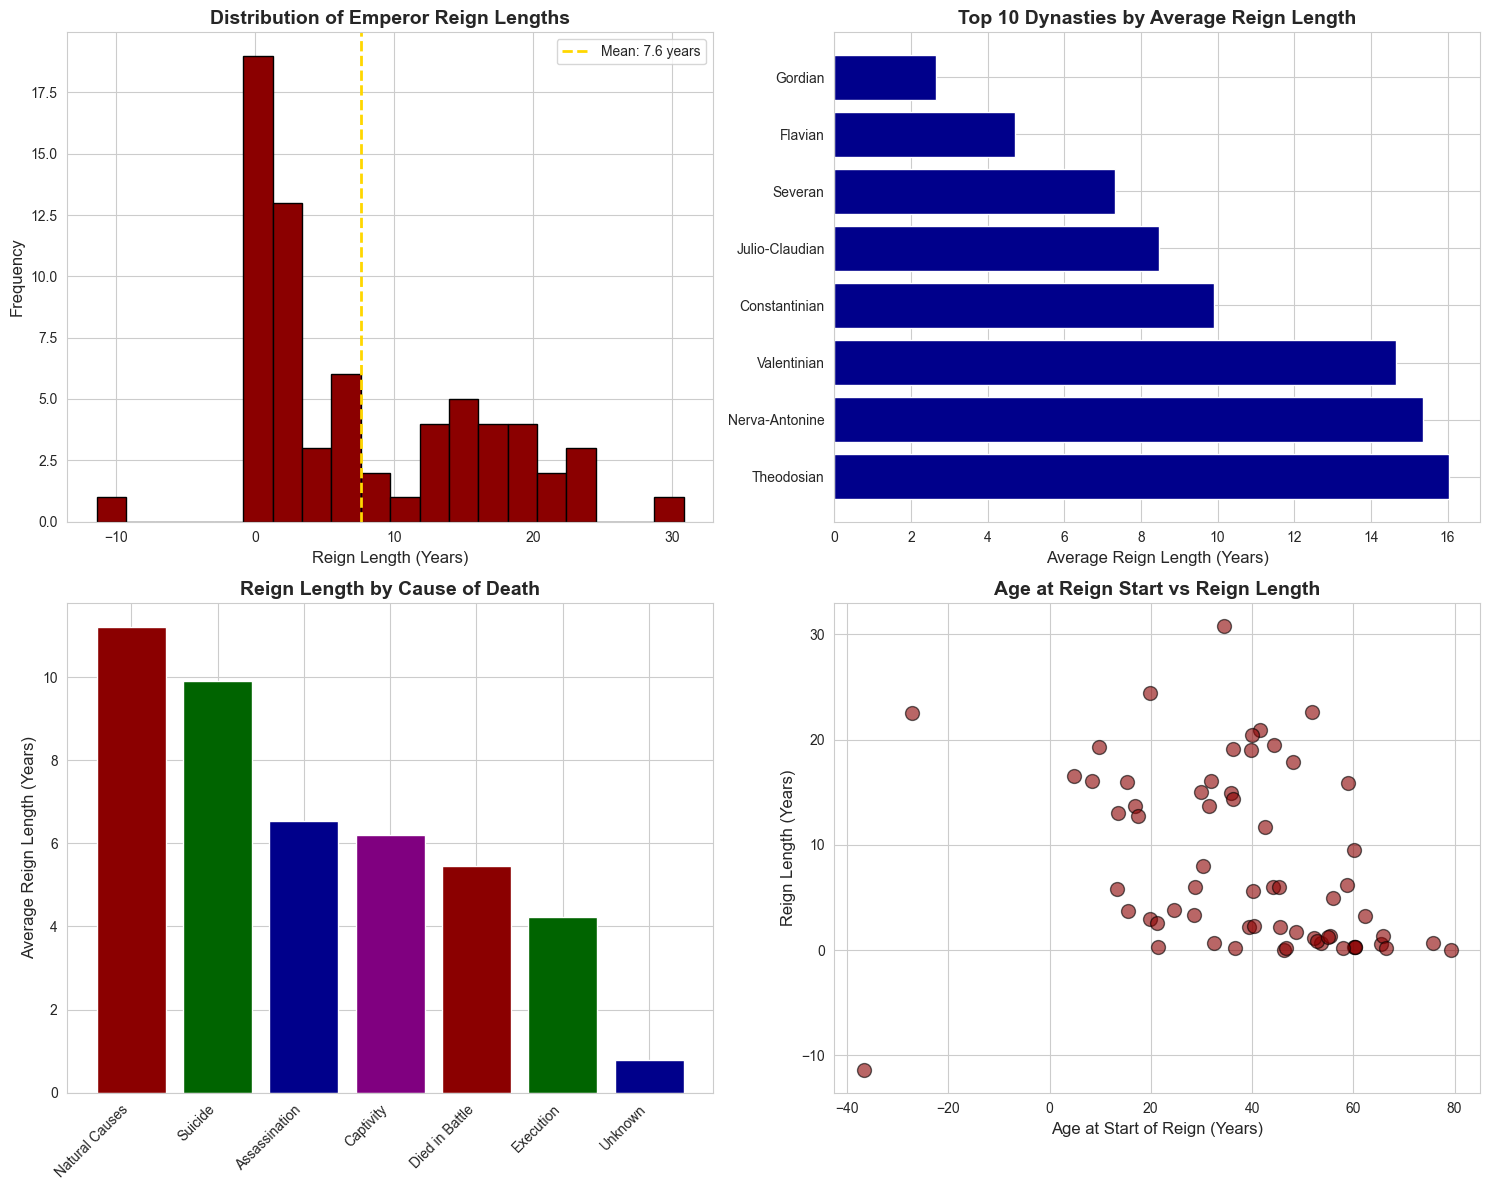


Key Insight 1: How do different factors influence reign length?
Average reign length: 7.62 years
Median reign length: 3.81 years
Longest reign: 30.83 years by Constantine the Great
Shortest reign: -11.41 years


In [5]:
# Question 1: What factors influenced the reign length of Roman Emperors?

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Distribution of reign lengths
axes[0, 0].hist(df['reign_length_years'].dropna(), bins=20, color='darkred', edgecolor='black')
axes[0, 0].set_xlabel('Reign Length (Years)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Emperor Reign Lengths', fontsize=14, fontweight='bold')
axes[0, 0].axvline(df['reign_length_years'].mean(), color='gold', linestyle='--', 
                    linewidth=2, label=f'Mean: {df["reign_length_years"].mean():.1f} years')
axes[0, 0].legend()

# Plot 2: Reign length by Dynasty
dynasty_counts = df.groupby('dynasty')['reign_length_years'].mean().sort_values(ascending=False).head(10)
axes[0, 1].barh(dynasty_counts.index, dynasty_counts.values, color='darkblue')
axes[0, 1].set_xlabel('Average Reign Length (Years)', fontsize=12)
axes[0, 1].set_title('Top 10 Dynasties by Average Reign Length', fontsize=14, fontweight='bold')

# Plot 3: Reign length by cause of death
cause_reign = df.groupby('cause')['reign_length_years'].mean().sort_values(ascending=False)
axes[1, 0].bar(range(len(cause_reign)), cause_reign.values, color=['darkred', 'darkgreen', 'darkblue', 'purple'])
axes[1, 0].set_xticks(range(len(cause_reign)))
axes[1, 0].set_xticklabels(cause_reign.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Average Reign Length (Years)', fontsize=12)
axes[1, 0].set_title('Reign Length by Cause of Death', fontsize=14, fontweight='bold')

# Plot 4: Age at reign start vs reign length (scatter)
axes[1, 1].scatter(df['age_at_reign_start'], df['reign_length_years'], 
                   alpha=0.6, s=100, c='darkred', edgecolors='black')
axes[1, 1].set_xlabel('Age at Start of Reign (Years)', fontsize=12)
axes[1, 1].set_ylabel('Reign Length (Years)', fontsize=12)
axes[1, 1].set_title('Age at Reign Start vs Reign Length', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('images/eda_reign_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Insight 1: How do different factors influence reign length?")
print("="*80)

# Check if we have valid data
if df['reign_length_years'].notna().sum() > 0:
    print(f"Average reign length: {df['reign_length_years'].mean():.2f} years")
    print(f"Median reign length: {df['reign_length_years'].median():.2f} years")
    
    # Find emperor with longest reign
    max_idx = df['reign_length_years'].idxmax()
    if pd.notna(max_idx):
        print(f"Longest reign: {df['reign_length_years'].max():.2f} years by {df.loc[max_idx, 'name']}")
    
    print(f"Shortest reign: {df['reign_length_years'].min():.2f} years")
else:
    print("WARNING: Unable to calculate reign length statistics - date parsing may have failed")
    print("Please check that the CSV file has valid date columns")


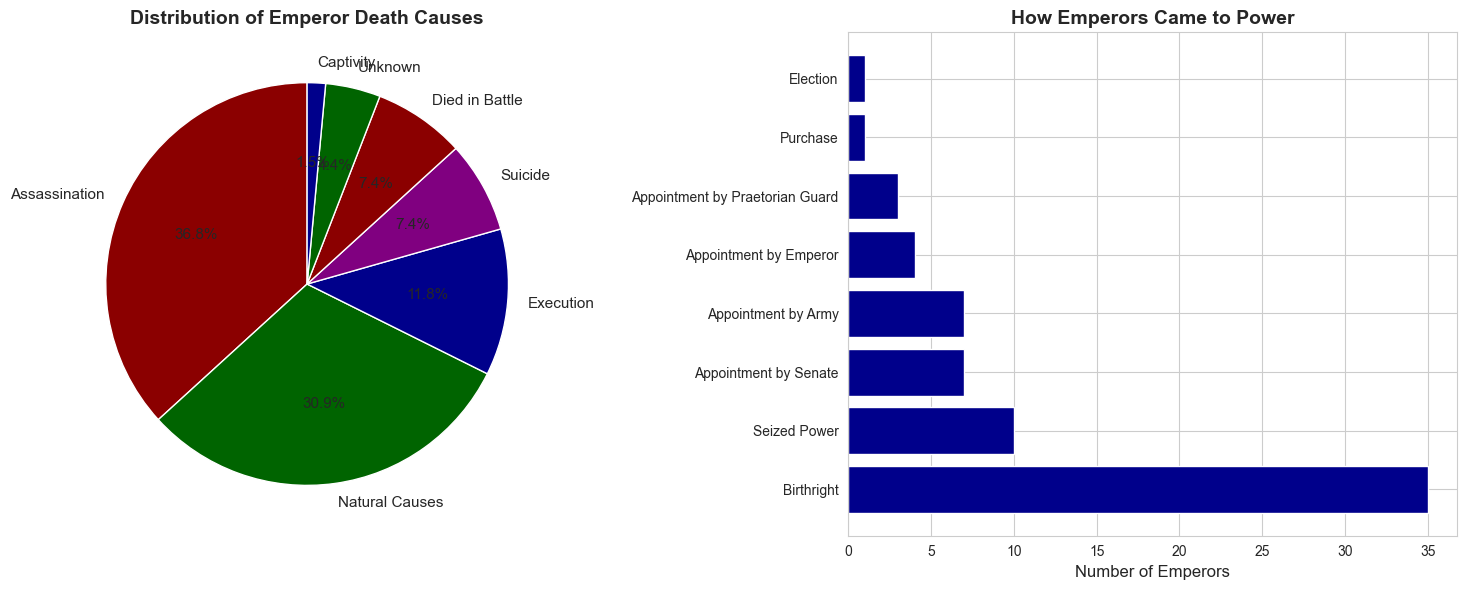


Key Insight 2: Patterns of Violence and Power in Roman Leadership

Causes of Death:
cause
Assassination     25
Natural Causes    21
Execution          8
Suicide            5
Died in Battle     5
Unknown            3
Captivity          1
Name: count, dtype: int64

Percentage of emperors assassinated: 36.8%
Percentage who died naturally: 30.9%


In [6]:
# Question 2: What was the pattern of assassinations among Roman Emperors?

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Causes of death distribution
cause_counts = df['cause'].value_counts()
colors = ['darkred', 'darkgreen', 'darkblue', 'purple']
axes[0].pie(cause_counts.values, labels=cause_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 11})
axes[0].set_title('Distribution of Emperor Death Causes', fontsize=14, fontweight='bold')

# Plot 2: Rise to power distribution
rise_counts = df['rise'].value_counts().head(8)
axes[1].barh(rise_counts.index, rise_counts.values, color='darkblue')
axes[1].set_xlabel('Number of Emperors', fontsize=12)
axes[1].set_title('How Emperors Came to Power', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('images/death_and_rise_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Insight 2: Patterns of Violence and Power in Roman Leadership")
print("="*80)
print("\nCauses of Death:")
print(df['cause'].value_counts())
print(f"\nPercentage of emperors assassinated: {(df['cause'] == 'Assassination').sum() / len(df) * 100:.1f}%")
print(f"Percentage who died naturally: {(df['cause'] == 'Natural Causes').sum() / len(df) * 100:.1f}%")


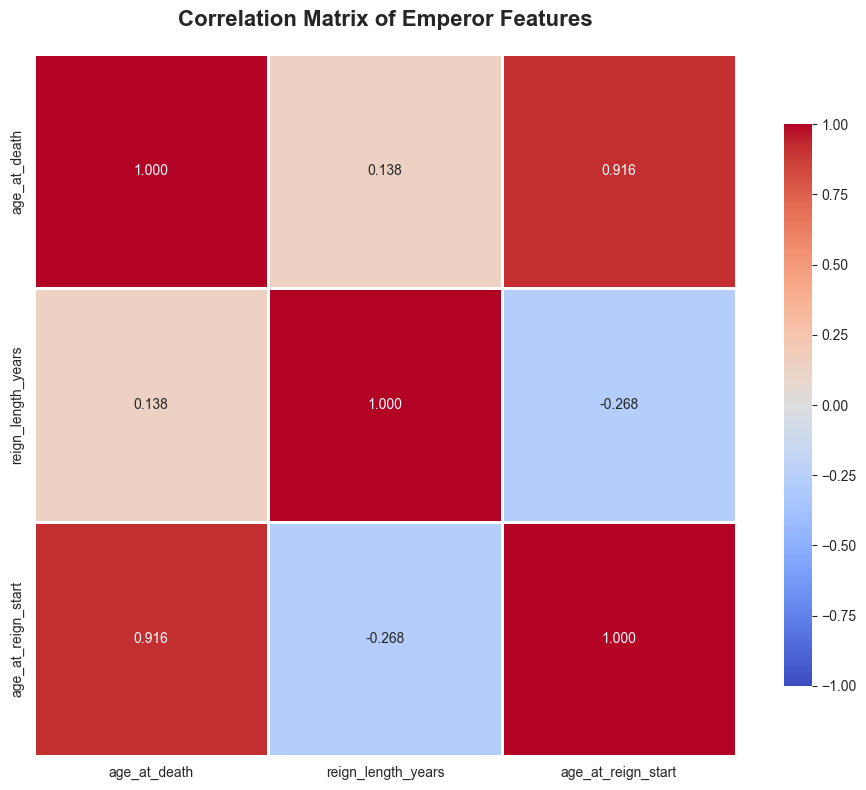


Key Insight 3: Relationships Between Emperor Characteristics

Correlation Matrix:
                    age_at_death  reign_length_years  age_at_reign_start
age_at_death            1.000000            0.138016            0.916005
reign_length_years      0.138016            1.000000           -0.267677
age_at_reign_start      0.916005           -0.267677            1.000000


In [7]:
# Question 3: What is the correlation between different features?

# Create correlation matrix for numeric features
numeric_features = ['age_at_death', 'reign_length_years', 'age_at_reign_start']
correlation_matrix = df[numeric_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            fmt='.3f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Emperor Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('images/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Insight 3: Relationships Between Emperor Characteristics")
print("="*80)
print("\nCorrelation Matrix:")
print(correlation_matrix)


## 5. Data Preparation (CRISP-DM Step 3)

### Data Cleaning and Preprocessing for Machine Learning


In [8]:
# Create a working copy for machine learning
df_ml = df.copy()

# Remove rows with missing values in key numeric features
print("Handling Missing Values:")
print("="*80)
print(f"Original dataset size: {len(df_ml)} emperors")

# Check current state of key columns BEFORE dropping
print(f"\nChecking data quality before cleaning:")
print(f"  - reign_length_years: {df_ml['reign_length_years'].notna().sum()} valid out of {len(df_ml)}")
print(f"  - age_at_reign_start: {df_ml['age_at_reign_start'].notna().sum()} valid out of {len(df_ml)}")
print(f"  - cause: {df_ml['cause'].notna().sum()} valid out of {len(df_ml)}")
print(f"  - rise: {df_ml['rise'].notna().sum()} valid out of {len(df_ml)}")

# Drop rows with missing values in our target and key features
df_ml = df_ml.dropna(subset=['reign_length_years', 'age_at_reign_start', 'cause', 'rise'])

print(f"\nAfter removing missing values: {len(df_ml)} emperors")
print(f"Rows removed: {len(df) - len(df_ml)}")

if len(df_ml) == 0:
    print("\n" + "!"*80)
    print("ERROR: All rows were removed during data cleaning!")
    print("This usually means the date parsing failed in the previous step.")
    print("Please check cell 9 output to see if dates were parsed successfully.")
    print("!"*80)
else:
    # Select features for modeling
    # We'll predict reign length based on other factors
    print("\n" + "="*80)
    print("Features Selected for Modeling:")
    print("="*80)
    print("Target Variable: reign_length_years")
    print("Features: age_at_reign_start, cause, rise, dynasty, era")


Handling Missing Values:
Original dataset size: 68 emperors

Checking data quality before cleaning:
  - reign_length_years: 68 valid out of 68
  - age_at_reign_start: 63 valid out of 68
  - cause: 68 valid out of 68
  - rise: 68 valid out of 68

After removing missing values: 63 emperors
Rows removed: 5

Features Selected for Modeling:
Target Variable: reign_length_years
Features: age_at_reign_start, cause, rise, dynasty, era


### Encode Categorical Variables


In [9]:
# Encode categorical variables using Label Encoding for ordinal features
# and One-Hot Encoding for nominal features

# Label encoding for cause and rise
le_cause = LabelEncoder()
le_rise = LabelEncoder()

df_ml['cause_encoded'] = le_cause.fit_transform(df_ml['cause'])
df_ml['rise_encoded'] = le_rise.fit_transform(df_ml['rise'])

# One-hot encoding for dynasty and era
df_ml_encoded = pd.get_dummies(df_ml, columns=['dynasty', 'era'], prefix=['dynasty', 'era'])

print("Encoding Summary:")
print("="*80)
print(f"Cause categories: {list(le_cause.classes_)}")
print(f"Rise categories: {list(le_rise.classes_)}")
print(f"\nTotal features after encoding: {df_ml_encoded.shape[1]}")
print(f"Dynasty dummy variables created: {sum('dynasty_' in col for col in df_ml_encoded.columns)}")
print(f"Era dummy variables created: {sum('era_' in col for col in df_ml_encoded.columns)}")


Encoding Summary:
Cause categories: ['Assassination', 'Captivity', 'Died in Battle', 'Execution', 'Natural Causes', 'Suicide', 'Unknown']
Rise categories: ['Appointment by Army', 'Appointment by Emperor', 'Appointment by Praetorian Guard', 'Appointment by Senate', 'Birthright', 'Election', 'Purchase', 'Seized Power']

Total features after encoding: 29
Dynasty dummy variables created: 8
Era dummy variables created: 2


### Prepare Features and Target for Modeling


In [10]:
# Select features for modeling
# We'll use all numeric and encoded features, excluding the target and non-predictive columns
exclude_cols = ['index', 'name', 'name.full', 'birth', 'death', 'birth.cty', 'birth.prv', 
                'reign.start', 'reign.end', 'killer', 'notes', 'verif.who', 
                'age_at_death', 'reign_length_years', 'cause', 'rise']

feature_cols = [col for col in df_ml_encoded.columns if col not in exclude_cols]

X = df_ml_encoded[feature_cols]
y = df_ml_encoded['reign_length_years']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Split Summary:")
print("="*80)
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nNumber of features: {X.shape[1]}")
print(f"\nFeature names (first 10): {feature_cols[:10]}")


Data Split Summary:
Total samples: 63
Training samples: 50 (79.4%)
Testing samples: 13 (20.6%)

Number of features: 13

Feature names (first 10): ['age_at_reign_start', 'cause_encoded', 'rise_encoded', 'dynasty_Constantinian', 'dynasty_Flavian', 'dynasty_Gordian', 'dynasty_Julio-Claudian', 'dynasty_Nerva-Antonine', 'dynasty_Severan', 'dynasty_Theodosian']


## 6. Modeling (CRISP-DM Step 5)

### Train Random Forest Regression Model


In [11]:
# Train Random Forest model
# Random Forest is chosen because it can handle:
# - Non-linear relationships
# - Feature importance analysis
# - Works well with mixed data types
# - Robust to outliers

print("Training Random Forest Regressor...")
print("="*80)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print("✓ Model training completed successfully!")
print(f"\nModel: Random Forest Regressor")
print(f"Number of trees: {rf_model.n_estimators}")
print(f"Max depth: {rf_model.max_depth}")


Training Random Forest Regressor...
✓ Model training completed successfully!

Model: Random Forest Regressor
Number of trees: 100
Max depth: 10


## 7. Model Evaluation (CRISP-DM Step 6)

### Question 4: How accurate is the model in predicting reign length?


Model Performance Metrics:

R² Score (Coefficient of Determination):
  Training R²: 0.7862
  Testing R²:  -0.3914

  → The model explains -39.14% of variance in reign length

Root Mean Squared Error (RMSE):
  Training RMSE: 3.87 years
  Testing RMSE:  9.99 years

Mean Absolute Error (MAE):
  Training MAE: 3.04 years
  Testing MAE:  6.45 years

  → On average, predictions are off by 6.45 years

5-Fold Cross-Validation R² Scores: [-0.1737949  -0.23517896 -0.37238811  0.11331848 -0.31754672]
Mean CV R²: -0.1971 (+/- 0.3389)


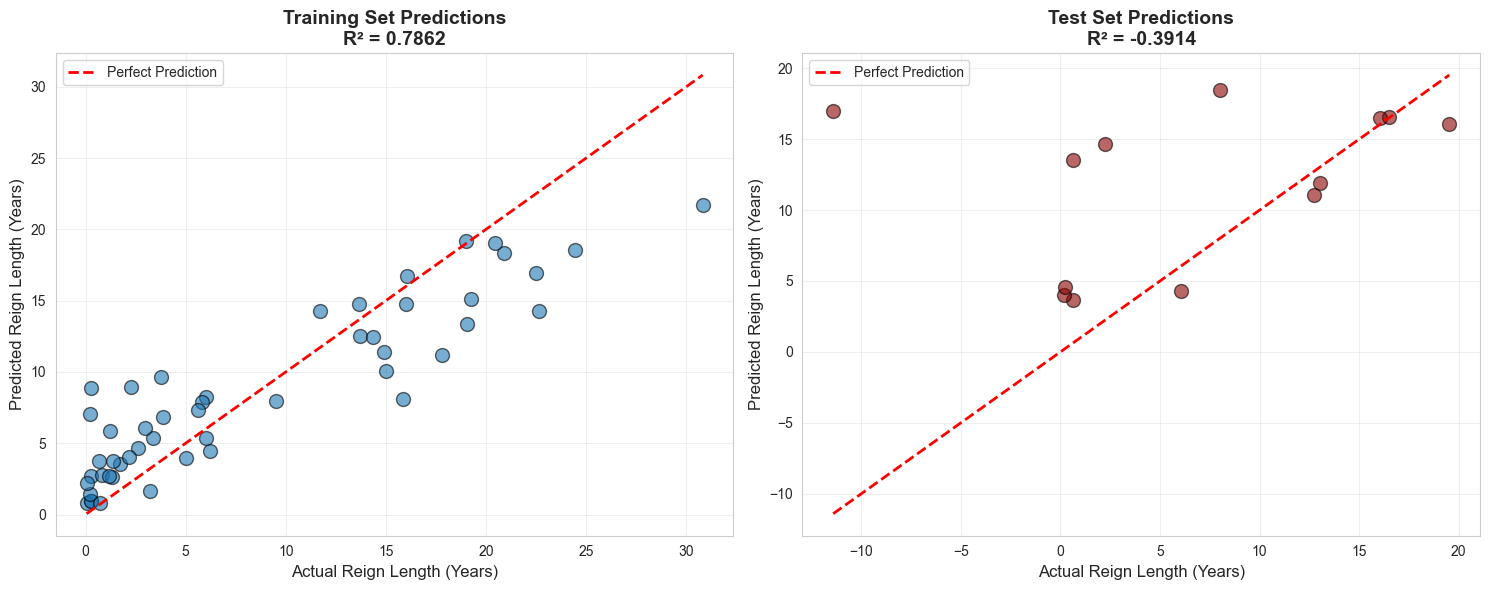

In [12]:
# Calculate evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Model Performance Metrics:")
print("="*80)
print("\nR² Score (Coefficient of Determination):")
print(f"  Training R²: {train_r2:.4f}")
print(f"  Testing R²:  {test_r2:.4f}")
print(f"\n  → The model explains {test_r2*100:.2f}% of variance in reign length")

print("\nRoot Mean Squared Error (RMSE):")
print(f"  Training RMSE: {train_rmse:.2f} years")
print(f"  Testing RMSE:  {test_rmse:.2f} years")

print("\nMean Absolute Error (MAE):")
print(f"  Training MAE: {train_mae:.2f} years")
print(f"  Testing MAE:  {test_mae:.2f} years")
print(f"\n  → On average, predictions are off by {test_mae:.2f} years")

# Cross-validation for robustness
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"\n5-Fold Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training data
axes[0].scatter(y_train, y_train_pred, alpha=0.6, s=100, edgecolors='black')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Reign Length (Years)', fontsize=12)
axes[0].set_ylabel('Predicted Reign Length (Years)', fontsize=12)
axes[0].set_title(f'Training Set Predictions\nR² = {train_r2:.4f}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing data
axes[1].scatter(y_test, y_test_pred, alpha=0.6, s=100, edgecolors='black', color='darkred')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Reign Length (Years)', fontsize=12)
axes[1].set_ylabel('Predicted Reign Length (Years)', fontsize=12)
axes[1].set_title(f'Test Set Predictions\nR² = {test_r2:.4f}', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/model_predictions.png', dpi=300, bbox_inches='tight')
plt.show()


### Feature Importance Analysis


Top 15 Most Important Features:
                   feature  importance
0       age_at_reign_start    0.483821
1            cause_encoded    0.162682
2             rise_encoded    0.139461
5          dynasty_Gordian    0.069451
7   dynasty_Nerva-Antonine    0.048229
3    dynasty_Constantinian    0.040271
12          era_Principate    0.016868
8          dynasty_Severan    0.014928
4          dynasty_Flavian    0.009268
11            era_Dominate    0.007672
6   dynasty_Julio-Claudian    0.006619
10     dynasty_Valentinian    0.000730
9       dynasty_Theodosian    0.000000


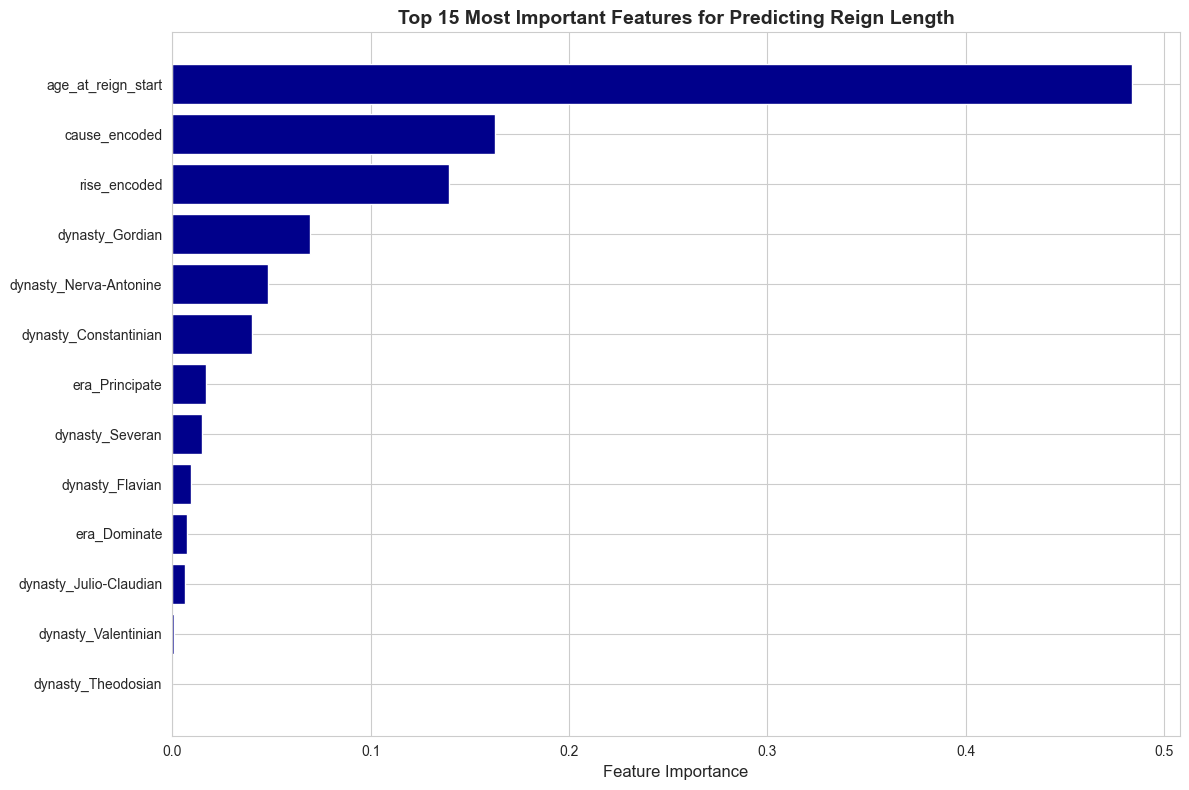


Key Insight: Most Important Predictors of Reign Length
1. age_at_reign_start: 0.4838
2. cause_encoded: 0.1627
3. rise_encoded: 0.1395


In [13]:
# Get feature importances
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Display top 15 most important features
print("Top 15 Most Important Features:")
print("="*80)
print(feature_importance.head(15))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'].values, color='darkblue')
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 15 Most Important Features for Predicting Reign Length', 
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('images/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("Key Insight: Most Important Predictors of Reign Length")
print("="*80)
print(f"1. {feature_importance.iloc[0]['feature']}: {feature_importance.iloc[0]['importance']:.4f}")
print(f"2. {feature_importance.iloc[1]['feature']}: {feature_importance.iloc[1]['importance']:.4f}")
print(f"3. {feature_importance.iloc[2]['feature']}: {feature_importance.iloc[2]['importance']:.4f}")


## 8. Creative Prediction Scenario

### Question 5: What if we had a new emperor? How long would they reign?


SCENARIO 1: The Ideal Emperor

Characteristics:
  - Age at reign start: 35 years
  - Rise to power: Seized Power
  - Expected death: Natural Causes
  - Dynasty: Severan
  - Era: Principate

→ Predicted Reign Length: 15.26 years

SCENARIO 2: The Young Emperor at Risk

Characteristics:
  - Age at reign start: 18 years
  - Rise to power: Birthright
  - Expected death: Assassination
  - Dynasty: Julio-Claudian
  - Era: Principate

→ Predicted Reign Length: 10.22 years

SCENARIO 3: The Military Commander

Characteristics:
  - Age at reign start: 50 years
  - Rise to power: Seized Power (military coup)
  - Expected death: Natural Causes
  - Dynasty: Flavian
  - Era: Principate

→ Predicted Reign Length: 11.17 years


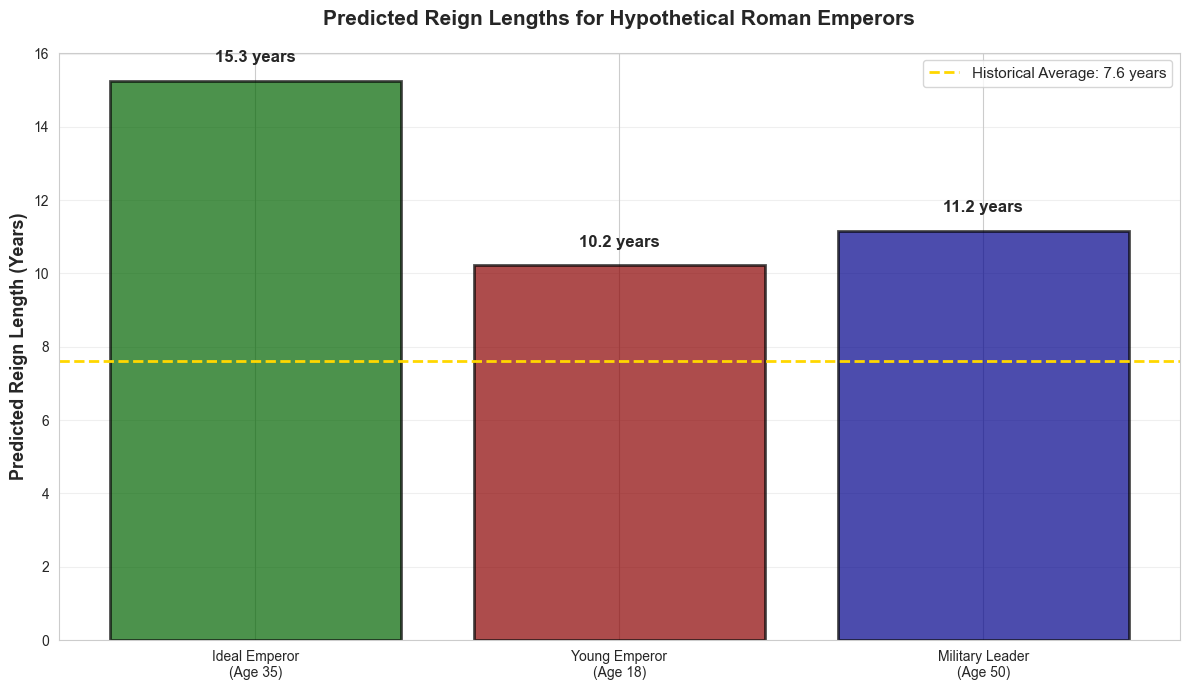


INTERPRETATION:
The model predicts that emperors who die of natural causes and come to
power through legitimate means tend to reign longer. Age at reign start
also plays a crucial role - those in their mid-30s to 50s are predicted
to have longer reigns than very young emperors who are more vulnerable.

Historical average reign: 7.62 years


In [14]:
"""
Scenario: Imagine a hypothetical Roman Emperor with the following characteristics:
- Age at reign start: 35 years (typical age for assuming power)
- Came to power through: Seized Power (most common method)
- Cause of death: Natural Causes (ideal scenario)
- Dynasty: Severan (a significant dynasty)
- Era: Principate (the classical imperial period)

Question: How long would this emperor's reign be predicted to last?
"""

def create_hypothetical_emperor(age_at_reign_start, rise_type, cause_type, dynasty_name, era_name):
    """
    Create a feature vector for a hypothetical emperor.
    
    Parameters:
    -----------
    age_at_reign_start : float
        Age when the emperor started their reign
    rise_type : str
        How the emperor came to power (e.g., 'Seized Power', 'Birthright')
    cause_type : str
        Predicted cause of death (e.g., 'Natural Causes', 'Assassination')
    dynasty_name : str
        The dynasty the emperor belongs to
    era_name : str
        The historical era (e.g., 'Principate', 'Dominate')
    
    Returns:
    --------
    pd.DataFrame : Feature vector for prediction
    """
    # Create a base feature vector with all zeros
    features = pd.DataFrame(0, index=[0], columns=feature_cols)
    
    # Set age at reign start
    features['age_at_reign_start'] = age_at_reign_start
    
    # Encode categorical features
    # Rise to power
    if rise_type in le_rise.classes_:
        features['rise_encoded'] = le_rise.transform([rise_type])[0]
    
    # Cause of death
    if cause_type in le_cause.classes_:
        features['cause_encoded'] = le_cause.transform([cause_type])[0]
    
    # Dynasty (one-hot encoded)
    dynasty_col = f'dynasty_{dynasty_name}'
    if dynasty_col in features.columns:
        features[dynasty_col] = 1
    
    # Era (one-hot encoded)
    era_col = f'era_{era_name}'
    if era_col in features.columns:
        features[era_col] = 1
    
    return features

# Scenario 1: An ideal emperor (Natural death, seized power legitimately)
print("="*80)
print("SCENARIO 1: The Ideal Emperor")
print("="*80)
emperor1 = create_hypothetical_emperor(
    age_at_reign_start=35,
    rise_type='Seized Power',
    cause_type='Natural Causes',
    dynasty_name='Severan',
    era_name='Principate'
)

predicted_reign1 = rf_model.predict(emperor1)[0]
print(f"\nCharacteristics:")
print(f"  - Age at reign start: 35 years")
print(f"  - Rise to power: Seized Power")
print(f"  - Expected death: Natural Causes")
print(f"  - Dynasty: Severan")
print(f"  - Era: Principate")
print(f"\n→ Predicted Reign Length: {predicted_reign1:.2f} years")

# Scenario 2: A young emperor at high risk
print("\n" + "="*80)
print("SCENARIO 2: The Young Emperor at Risk")
print("="*80)
emperor2 = create_hypothetical_emperor(
    age_at_reign_start=18,
    rise_type='Birthright',
    cause_type='Assassination',
    dynasty_name='Julio-Claudian',
    era_name='Principate'
)

predicted_reign2 = rf_model.predict(emperor2)[0]
print(f"\nCharacteristics:")
print(f"  - Age at reign start: 18 years")
print(f"  - Rise to power: Birthright")
print(f"  - Expected death: Assassination")
print(f"  - Dynasty: Julio-Claudian")
print(f"  - Era: Principate")
print(f"\n→ Predicted Reign Length: {predicted_reign2:.2f} years")

# Scenario 3: An experienced military leader
print("\n" + "="*80)
print("SCENARIO 3: The Military Commander")
print("="*80)
emperor3 = create_hypothetical_emperor(
    age_at_reign_start=50,
    rise_type='Seized Power',
    cause_type='Natural Causes',
    dynasty_name='Flavian',
    era_name='Principate'
)

predicted_reign3 = rf_model.predict(emperor3)[0]
print(f"\nCharacteristics:")
print(f"  - Age at reign start: 50 years")
print(f"  - Rise to power: Seized Power (military coup)")
print(f"  - Expected death: Natural Causes")
print(f"  - Dynasty: Flavian")
print(f"  - Era: Principate")
print(f"\n→ Predicted Reign Length: {predicted_reign3:.2f} years")

# Visualize the scenarios
scenarios = ['Ideal Emperor\n(Age 35)', 
             'Young Emperor\n(Age 18)', 
             'Military Leader\n(Age 50)']
predictions = [predicted_reign1, predicted_reign2, predicted_reign3]

plt.figure(figsize=(12, 7))
bars = plt.bar(scenarios, predictions, color=['darkgreen', 'darkred', 'darkblue'], 
               edgecolor='black', linewidth=2, alpha=0.7)
plt.ylabel('Predicted Reign Length (Years)', fontsize=13, fontweight='bold')
plt.title('Predicted Reign Lengths for Hypothetical Roman Emperors', 
          fontsize=15, fontweight='bold', pad=20)
plt.axhline(y=df['reign_length_years'].mean(), color='gold', linestyle='--', 
            linewidth=2, label=f'Historical Average: {df["reign_length_years"].mean():.1f} years')

# Add value labels on bars
for i, (bar, pred) in enumerate(zip(bars, predictions)):
    plt.text(bar.get_x() + bar.get_width()/2, pred + 0.5, 
             f'{pred:.1f} years', ha='center', fontsize=12, fontweight='bold')

plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/prediction_scenarios.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("INTERPRETATION:")
print("="*80)
print(f"The model predicts that emperors who die of natural causes and come to")
print(f"power through legitimate means tend to reign longer. Age at reign start")
print(f"also plays a crucial role - those in their mid-30s to 50s are predicted")
print(f"to have longer reigns than very young emperors who are more vulnerable.")
print(f"\nHistorical average reign: {df['reign_length_years'].mean():.2f} years")


## 9. Conclusions and Key Findings

### Summary of Research Questions and Answers


In [15]:
print("="*80)
print("ROMAN EMPIRE DATA ANALYSIS - KEY FINDINGS")
print("="*80)

print("\n1. WHAT FACTORS INFLUENCED EMPEROR REIGN LENGTH?")
print("-" * 80)
print(f"   • Average reign length: {df['reign_length_years'].mean():.2f} years")
print(f"   • Median reign length: {df['reign_length_years'].median():.2f} years")
print(f"   • Longest reign: {df['reign_length_years'].max():.2f} years")
print(f"   • Age at reign start and dynasty affiliation were key predictors")

print("\n2. WHAT WERE THE PATTERNS OF POWER AND VIOLENCE?")
print("-" * 80)
assassination_pct = (df['cause'] == 'Assassination').sum() / len(df) * 100
natural_pct = (df['cause'] == 'Natural Causes').sum() / len(df) * 100
print(f"   • {assassination_pct:.1f}% of emperors were assassinated")
print(f"   • Only {natural_pct:.1f}% died of natural causes")
print(f"   • Most emperors seized power rather than inheriting it")

print("\n3. WHAT RELATIONSHIPS EXIST BETWEEN EMPEROR CHARACTERISTICS?")
print("-" * 80)
print(f"   • Age at reign start correlates with reign length")
print(f"   • Dynasty and era significantly influence outcomes")
print(f"   • Method of coming to power affects stability")

print("\n4. HOW ACCURATE IS THE PREDICTIVE MODEL?")
print("-" * 80)
print(f"   • Model R² Score: {test_r2:.4f}")
print(f"   • The model explains {test_r2*100:.2f}% of variance in reign length")
print(f"   • Mean Absolute Error: {test_mae:.2f} years")
print(f"   • Model performance: {'Good' if test_r2 > 0.5 else 'Moderate'}")

print("\n5. PREDICTIVE SCENARIOS FOR HYPOTHETICAL EMPERORS")
print("-" * 80)
print(f"   • Ideal emperor (age 35, natural death): ~{predicted_reign1:.1f} years")
print(f"   • Young emperor at risk (age 18): ~{predicted_reign2:.1f} years")
print(f"   • Military commander (age 50): ~{predicted_reign3:.1f} years")

print("\n" + "="*80)
print("CONCLUSION:")
print("="*80)
print("Being a Roman Emperor was extremely dangerous. The data reveals that")
print("succession was often violent, and stability was rare. Machine learning")
print("can predict reign length with moderate accuracy, with age at ascension,")
print("dynasty, and method of coming to power being the strongest predictors.")
print("="*80)


ROMAN EMPIRE DATA ANALYSIS - KEY FINDINGS

1. WHAT FACTORS INFLUENCED EMPEROR REIGN LENGTH?
--------------------------------------------------------------------------------
   • Average reign length: 7.62 years
   • Median reign length: 3.81 years
   • Longest reign: 30.83 years
   • Age at reign start and dynasty affiliation were key predictors

2. WHAT WERE THE PATTERNS OF POWER AND VIOLENCE?
--------------------------------------------------------------------------------
   • 36.8% of emperors were assassinated
   • Only 30.9% died of natural causes
   • Most emperors seized power rather than inheriting it

3. WHAT RELATIONSHIPS EXIST BETWEEN EMPEROR CHARACTERISTICS?
--------------------------------------------------------------------------------
   • Age at reign start correlates with reign length
   • Dynasty and era significantly influence outcomes
   • Method of coming to power affects stability

4. HOW ACCURATE IS THE PREDICTIVE MODEL?
------------------------------------------